Изобретать велосипед не буду и воспользуюсь готовым решением - auto_arima. Надо построить график и проверить, есть ли какая-то сезонность-паттерн, определиться с типами данных в датасете и поменять название колонки с очень длинным названием. В конце построить график прогноза.

In [1]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_file.csv') # файл я переменовал, ибо там длинное название

In [3]:
data['Deaths'] = data[data.columns[1]] # хочу нормальное название колонки. уверен что можно сделать по-другому, но мне так быстрее

In [4]:
data.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978",Deaths
0,1973-01,9007,9007
1,1973-02,8106,8106
2,1973-03,8928,8928
3,1973-04,9137,9137
4,1973-05,10017,10017


In [5]:
data.drop(data.columns[1], axis=1, inplace=True) # дропаю колонку с длинным названием

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   72 non-null     object
 1   Deaths  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [7]:
data.Month = pd.to_datetime(data.Month) # т.к. дата имеет тип обьекта, то надо это исрпавить и перегнать в datetime

In [8]:
data.head()

,Month,Deaths
0,1973-01-01,9007
1,1973-02-01,8106
2,1973-03-01,8928
3,1973-04-01,9137
4,1973-05-01,10017


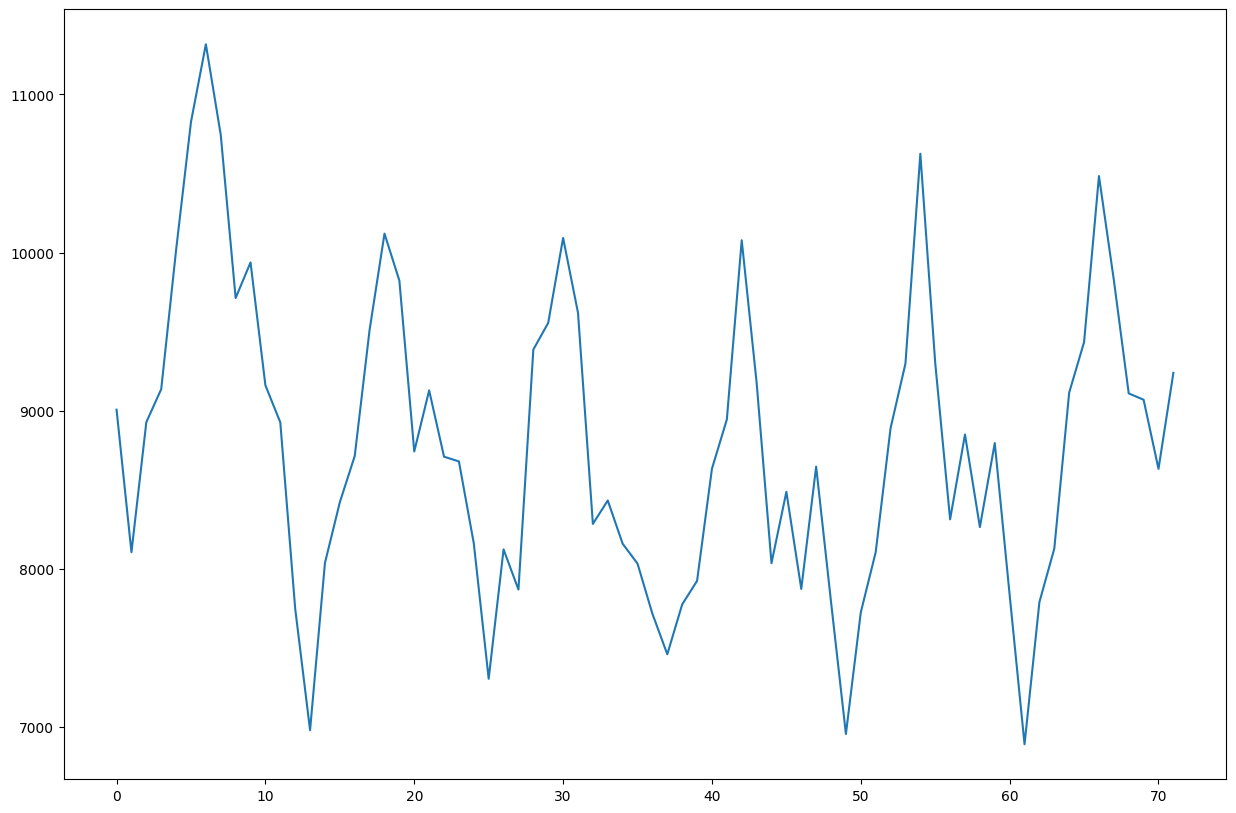

In [9]:
plt.figure(figsize=(15,10)) # хочу посмотреть на график и увидеть, если ли какая-то сезонность-паттерн
plt.plot(data.Deaths)

In [10]:
model = auto_arima(data.Deaths, seasonal=True, m=12) # 12 месяцев, т.к в каждому году есть скачок

In [11]:
model.fit(data.Deaths)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [12]:
forecast = model.predict(n_periods=24) # предикт на 2 года = 24 месяцам

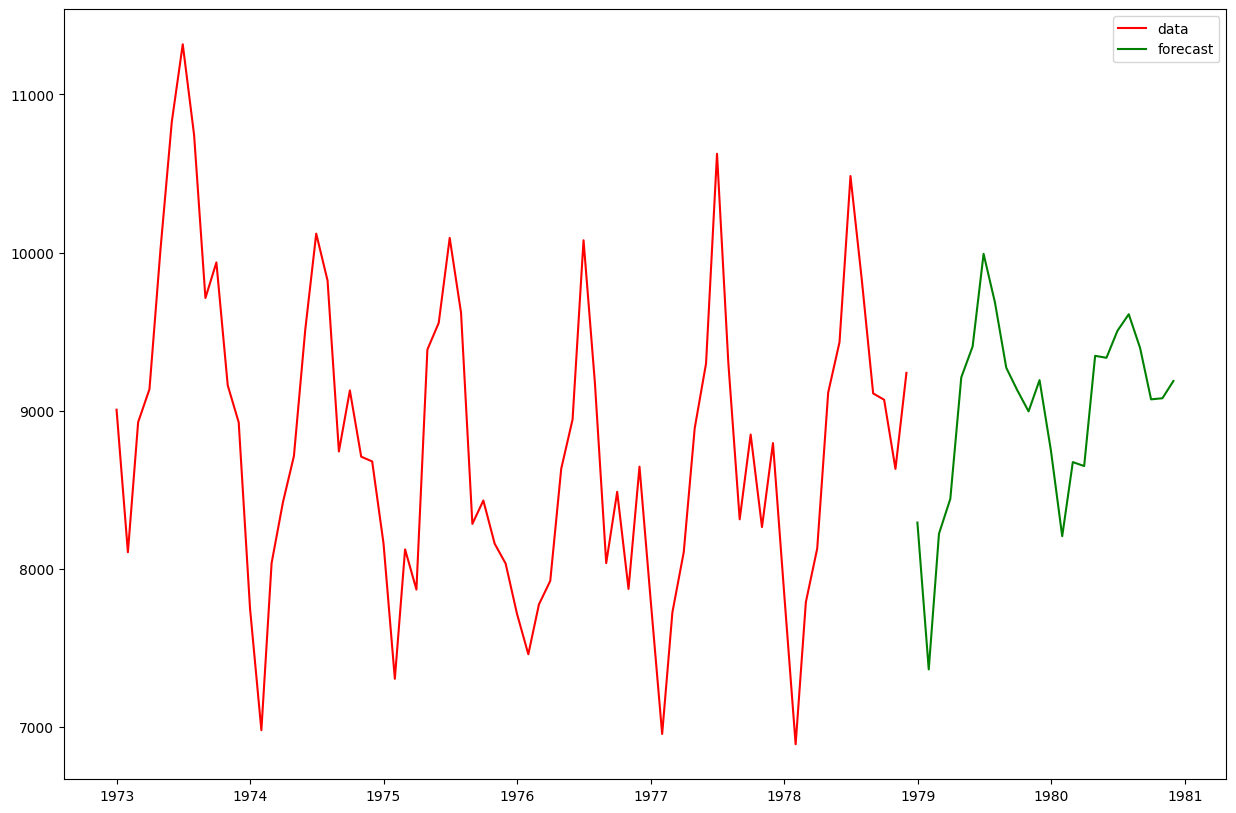

In [22]:
plt.figure(figsize=(15,10))
plt.plot(data.Month, data.Deaths, color='red', label='data')
plt.plot(pd.date_range(start=data.Month.max(), periods=24, freq='M'), forecast, color='green', label='forecast') # строю ренжу по месяцам для того, чтобы отображался год под прогнозом
plt.legend()

На графике есть так называемый Gap. Час искал способ его устранить, но ничего не нашел(я пробовал и fillbetween и fillbetweenx). Да и в принципе гэп это стандартная ситуация у временных рядов(сужу по бирже). 